In [10]:
#cargo librerias

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd



# **Ejercicio 1** - DEFINIR K EN BASE A SUMA DE CUADRADOS WITHIN


Entrega 3: Análisis de clusters

**Ejercicio 1.
1- Escribir un programa en R que a partir de un conjunto de datos, grafique en función de k (cantidad de clusters a separar entre los datos) para k entre 2 y un determinado valor y que calcule la suma de cuadrados whithin (lo cual servirá para sugerir algún valor adecuado de la cantidad de clusters en la cual separar: aquel donde se encuentre un "codo" en la disminución de la función a minimizar)**

In [ ]:
#cargo los datos
from statsmodels.datasets import get_rdataset


DF_USArrests = get_rdataset('USArrests').data
print(DF_USArrests.head())

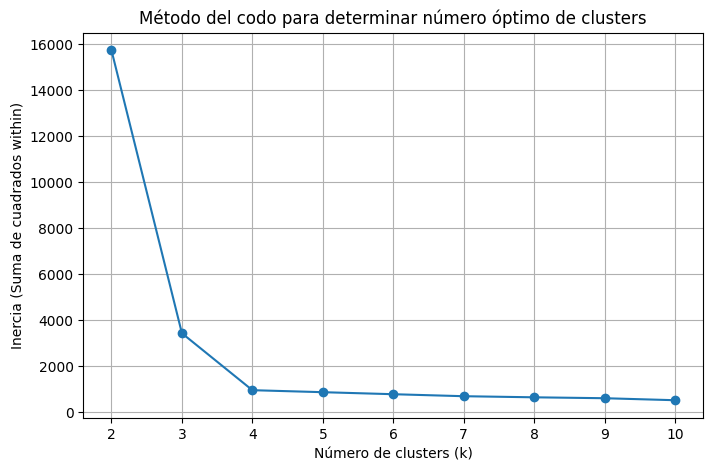

In [ ]:
## programa para graficar cuadrados within para K
# 1. Crear un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# 2. Definir el rango de k (número de clusters) a probar
k_values = range(2, 11)  # Vamos a probar de 2 a 10 clusters
inertia_values = []  # Lista para almacenar la suma de cuadrados (inercia)

# 3. Calcular KMeans para cada valor de k y almacenar la inercia (suma de cuadrados within // suma de las distancias cuadradas dentro de los clusters)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Almacenamos la inercia

# 4. Graficar la inercia en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del codo para determinar número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de cuadrados within)')
plt.grid(True)
plt.show()

**2- Utilizando los datos de USArrests, hacer un gráfico como el programado en la  parte anterior, elegir un valor de k y separar en esos k grupos, indicando los estados pertenecientes a cada grupo**

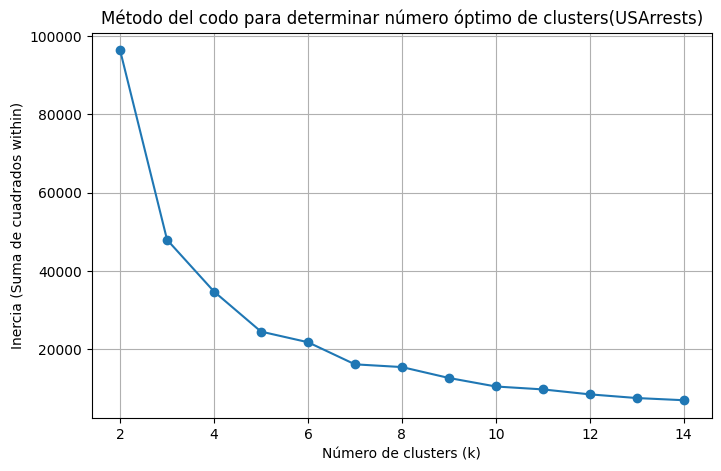

In [ ]:
##usar programa para USA arrests

# 2. Definir el rango de k (número de clusters) a probar
k_values = range(2, 15)  # Vamos a probar de 2 a 15 clusters
inertia_values = []  # Lista para almacenar la suma de cuadrados (inercia)

# 3. Calcular KMeans para cada valor de k y almacenar la inercia (suma de cuadrados within // suma de las distancias cuadradas dentro de los clusters)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(DF_USArrests)
    inertia_values.append(kmeans.inertia_)  # Almacenamos la inercia

# 4. Graficar la inercia en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del codo para determinar número óptimo de clusters(USArrests)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de cuadrados within)')
plt.grid(True)
plt.show()

In [ ]:
# 5. Elegimos un valor de k (probe con 7 y no se visualiza tan bien como con 4 - a discutir el 'descenso' entre 6 y 7 K)
k_optimo = 4

# 6. Aplicar KMeans con el valor óptimo de k
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(DF_USArrests)  # Asignar cada estado a un cluster

# 7. Añadir los clusters al DataFrame original para ver a qué grupo pertenece cada estado
DF_USArrests['Cluster_KMeans'] = clusters_kmeans

# 8. Mostrar los estados pertenecientes a cada grupo (cluster)
for i in range(k_optimo):
    print(f"Estados en el cluster {i+1}:")
    print(DF_USArrests[DF_USArrests['Cluster_KMeans'] == i].index.tolist())
    print("\n")

Estados en el cluster 1:
['Hawaii', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']


Estados en el cluster 2:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']


Estados en el cluster 3:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


Estados en el cluster 4:
['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']




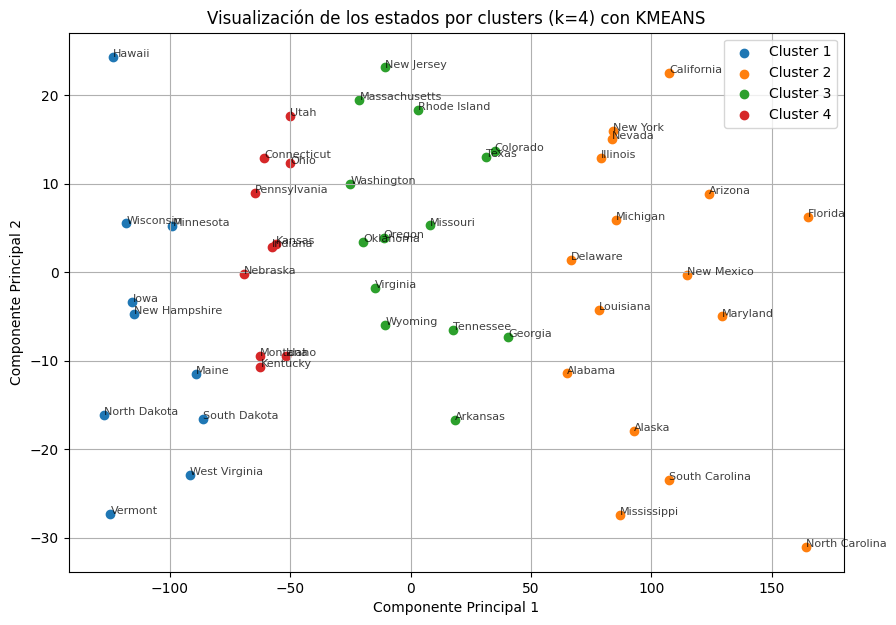

In [ ]:
#uso PCA para visualizar los clusters en 2D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(DF_USArrests.drop(columns='Cluster_KMeans'))  # Excluimos la columna Cluster

#grafico
plt.figure(figsize=(10, 7))

# Graficamos los puntos de cada cluster con diferentes colores
for cluster in range(k_optimo):
    cluster_data = pca_result[DF_USArrests['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# etiquetas a los estados
for i, state in enumerate(DF_USArrests.index):
    plt.annotate(state, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.75)

# etiquetas y leyenda
plt.title(f'Visualización de los estados por clusters (k={k_optimo}) con KMEANS')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

plt.show()

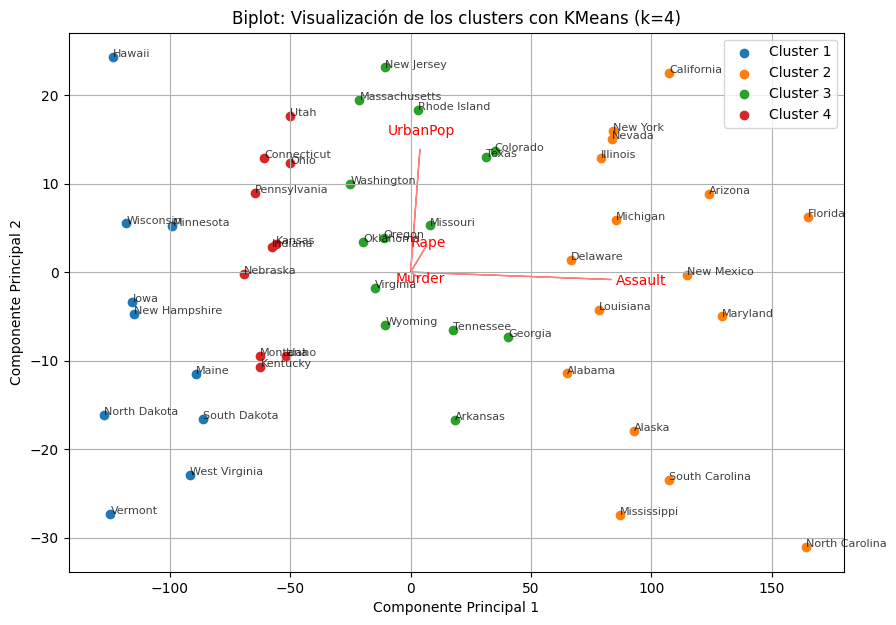

In [ ]:
#mismo chart pero con las flechas de las variables // por alguna razon me salta la flecha para el cluster aunque la este droppeando

# !! Obtenemos las cargas de las variables (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Repito proceso:
# Creamos una figura para la gráfica de dispersión
plt.figure(figsize=(10, 7))

# 7. Graficamos los puntos de cada cluster con diferentes colores
for cluster in range(k_optimo):
    cluster_data = pca_result[DF_USArrests['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# 8. Añadir etiquetas a los estados (opcional)
for i, state in enumerate(DF_USArrests.index):
    plt.annotate(state, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.75)

# 9. Graficar las flechas de las variables
features = DF_USArrests.columns[:-1]  # Excluimos la columna de clusters (Cluster_KMeans)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='r', ha='center', va='center')

# 10. Añadimos etiquetas y leyenda
plt.title(f'Biplot: Visualización de los clusters con KMeans (k={k_optimo})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

# 11. Mostrar la gráfica
plt.show()

**3- Aplicar las partes 1 y 2 pero aplicando pam (partitioning around mediods) en lugar de kmeans con la distancia de Manhattan**

PAM es un algoritmo de clustering similar a K-Means, pero con algunas diferencias clave:

*   Medoides en lugar de centroides: Mientras que K-Means utiliza los centroides (promedios) para representar cada cluster, PAM utiliza medoides. Un medoide es el objeto dentro del conjunto de datos cuya disimilitud (distancia) a los otros puntos del cluster es mínima. Es decir, es un punto real del conjunto de datos, mientras que el centroide puede ser un valor calculado y no necesariamente un punto real.
*   Resistente a valores atípicos: PAM es más robusto que K-Means cuando hay outliers (valores atípicos) en los datos, ya que los medoides no se ven tan afectados por la presencia de puntos extremos como los centroides.

---

Distancia de Manhattan: PAM puede utilizar diferentes métricas de distancia para definir la similitud entre los puntos, como la distancia Manhattan (también conocida como la distancia "taxi"). En este caso, la distancia Manhattan entre dos puntos es la suma de las diferencias absolutas entre las coordenadas de los puntos, en lugar de la distancia euclidiana.

In [ ]:
#instalo paquete
#!pip install pyclustering

# Importar las librerías
import numpy as np
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from pyclustering.cluster import cluster_visualizer
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

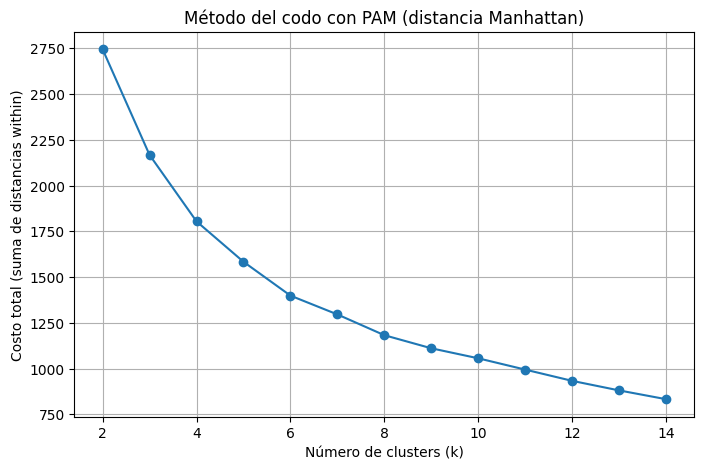

Estados en el cluster 1:
['Maine', 'South Dakota', 'West Virginia']


Estados en el cluster 2:
['Oklahoma', 'Oregon', 'Virginia', 'Wyoming']


Estados en el cluster 3:
['Hawaii', 'Iowa', 'Minnesota', 'New Hampshire', 'North Dakota', 'Vermont', 'Wisconsin']


Estados en el cluster 4:
['Alabama', 'Delaware', 'Illinois', 'Louisiana', 'Mississippi']


Estados en el cluster 5:
['Arkansas', 'Colorado', 'Georgia', 'Missouri', 'Tennessee', 'Texas']


Estados en el cluster 6:
['Massachusetts', 'New Jersey', 'Rhode Island', 'Washington']


Estados en el cluster 7:
['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']


Estados en el cluster 8:
['Alaska', 'Michigan', 'Nevada', 'New York']


Estados en el cluster 9:
['Arizona', 'California', 'Maryland', 'New Mexico', 'South Carolina']


Estados en el cluster 10:
['Florida', 'North Carolina']




In [ ]:
# 1. Definir el número de clusters
k_values = range(2, 15)  # Probamos k entre 2 y 14
costs = []  # Lista para guardar los costos de PAM (suma de distancias dentro de los clusters)

# 2. Calcular la matriz de distancia utilizando la distancia Manhattan
distance_matrix = cdist(DF_USArrests, DF_USArrests, metric='cityblock')

# 3. Aplicar PAM para diferentes valores de k y calcular el costo para cada k
for k in k_values:
    # Inicializar las posiciones iniciales de los medoids (elegimos aleatoriamente)
    initial_medoids = np.random.choice(len(DF_USArrests), k, replace=False).tolist()

    # Aplicar el algoritmo K-Medoids (PAM)
    pam_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    pam_instance.process()

    # Obtener los clusters y los medoids resultantes
    clusters = pam_instance.get_clusters()
    medoids = pam_instance.get_medoids()

    # Calcular el costo total (suma de distancias within) para este k
    total_cost = sum([distance_matrix[i][medoid] for cluster in clusters for i in cluster for medoid in [medoids[clusters.index(cluster)]]])
    costs.append(total_cost)

# 4. Graficar el método del codo (costos en función de k)
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.title('Método del codo con PAM (distancia Manhattan)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Costo total (suma de distancias within)')
plt.grid(True)
plt.show()

# 5. Elegimos el valor de k óptimo (según el gráfico del codo, k=4)
k_optimo = 10

# 6. Aplicar PAM con el valor óptimo de k
initial_medoids_optimo = np.random.choice(len(DF_USArrests), k_optimo, replace=False).tolist()
pam_instance_final = kmedoids(distance_matrix, initial_medoids_optimo, data_type='distance_matrix')
pam_instance_final.process()

# 7. Obtener los clusters y asignar los estados a cada grupo
clusters_final = pam_instance_final.get_clusters()

# 8. Crear una columna en el DataFrame con el cluster al que pertenece cada estado
cluster_labels = np.zeros(len(DF_USArrests))
for cluster_index, cluster in enumerate(clusters_final):
    for index in cluster:
        cluster_labels[index] = cluster_index
DF_USArrests['Cluster_PAM'] = cluster_labels

# 9. Mostrar los estados pertenecientes a cada grupo (cluster)
for i in range(k_optimo):
    print(f"Estados en el cluster {i+1}:")
    print(DF_USArrests[DF_USArrests['Cluster_PAM'] == i].index.tolist())
    print("\n")

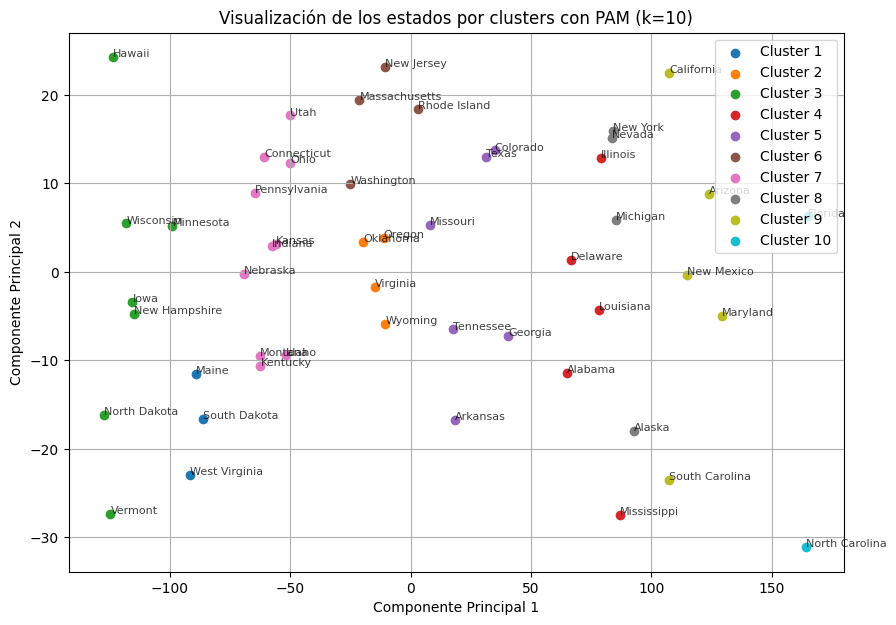

In [ ]:
#uso PCA para visualizarlo en un grafico
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(DF_USArrests.drop(columns='Cluster_PAM'))  # Excluimos la columna 'Cluster_PAM'

# 2. Creamos una figura para la gráfica de dispersión
plt.figure(figsize=(10, 7))

# 3. Graficamos los puntos de cada cluster con diferentes colores
for cluster in range(k_optimo):
    cluster_data = pca_result[DF_USArrests['Cluster_PAM'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# 4. Añadir etiquetas a los estados (opcional)
for i, state in enumerate(DF_USArrests.index):
    plt.annotate(state, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.75)

# 5. Añadimos etiquetas y leyenda
plt.title(f'Visualización de los estados por clusters con PAM (k={k_optimo})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)

# 6. Mostrar la gráfica
plt.show()


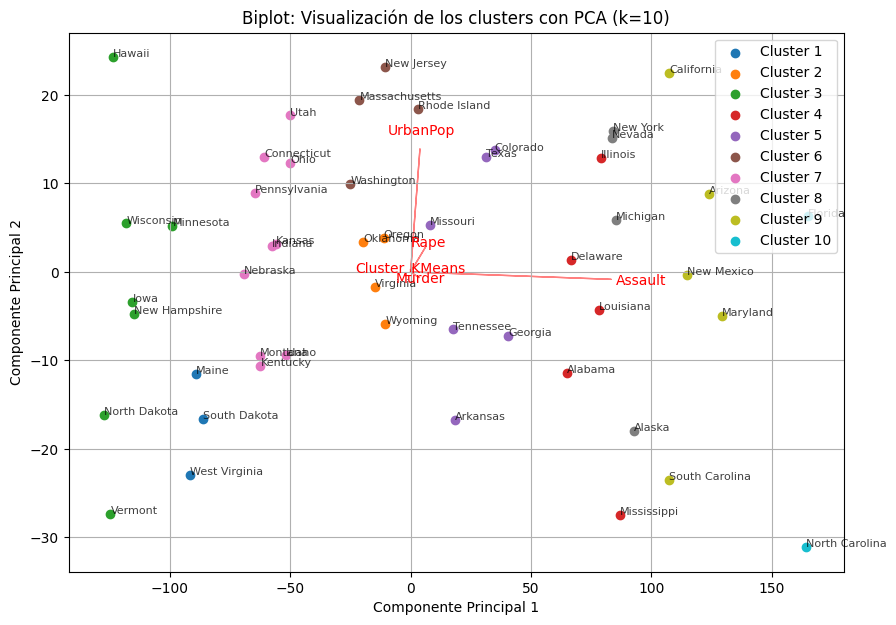

In [ ]:
#quiero ver el biplot con las flechas de las variables para PAM - me aparece cluster porque tengo que copiar el DF original asi no hago el PAM con los clusters anteriores, hay q corregir eso
# 1. Aplicamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(DF_USArrests.drop(columns='Cluster_PAM'))  # Excluimos la columna 'Cluster_PAM'

# 2. Obtenemos las cargas de las variables (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 3. Creamos una figura para la gráfica de dispersión
plt.figure(figsize=(10, 7))

# 4. Graficamos los puntos de cada cluster con diferentes colores
for cluster in range(k_optimo):
    cluster_data = pca_result[DF_USArrests['Cluster_PAM'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# 5. Añadir etiquetas a los estados (opcional)
for i, state in enumerate(DF_USArrests.index):
    plt.annotate(state, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.75)

# 6. Graficar las flechas de las variables
features = DF_USArrests.columns[:-1]  # Excluimos la columna de los clusters
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='r', ha='center', va='center')

# 7. Añadimos etiquetas y leyenda
plt.title(f'Biplot: Visualización de los clusters con PCA (k={k_optimo})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)


plt.show()

# **Ejercicio 2** - CRITERIOS SEPARACION DE GRUPOS (SILHOUETTE, DUNN) Y COMPARACION METODOS (JACCARD, RAND) Y DENDOGRAMAS (COHPENETIC)

**Ejercicio 2.**
1- Utilizando los datos NCI60 (de la entrega anterior) seleccionar un número adecuado de grupos en los cuales separar (utilizar algún criterio para la elección del número adecuado de grupos).

**Resumen:**
**Criterios para la elección del número adecuado de grupos en clustering**:

1. **Codo o "Elbow method":** Este criterio consiste en graficar la suma de los cuadrados intra-cluster (inertia) frente al número de clusters. La idea es encontrar un punto en la curva donde la disminución en la inercia comienza a ser menos pronunciada (el codo de la gráfica). Este punto sugiere el número óptimo de clusters.

2. **Coeficiente de Silhouette:** Evalúa qué tan bien se separan los clusters, comparando la distancia media entre un punto y los puntos en el mismo cluster con la distancia a los puntos en el cluster más cercano. El valor varía entre -1 y 1; valores cercanos a 1 indican que los clusters están bien definidos.El coeficiente de Silhouette evalúa qué tan bien está agrupado un objeto dentro de su cluster, en comparación con los objetos de otros clusters. Para cada punto, este coeficiente se calcula como:
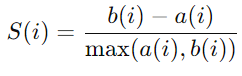

3. ** Índice de Dunn:** Es una métrica que tiene en cuenta tanto la cohesión como la separación entre los clusters. Maximizar este índice ayuda a seleccionar un número óptimo de clusters. El Índice de Dunn mide la calidad de un conjunto de clusters teniendo en cuenta tanto la mínima distancia entre clusters (separación) como la máxima distancia intra-cluster (cohesión). Se define como:
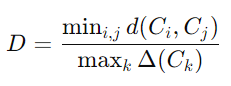

In [4]:
#cargo datos
# Carga de csv a la session de collab
NCI60 = pd.read_csv('NCI60.csv')
# Extraer las etiquetas de la columna 'labs'
nci_labs = NCI60['labs']

# Extraer los datos, que están en todas las columnas excepto 'Unnamed: 0' y 'labs'
nci_data = NCI60.drop(['Unnamed: 0', 'labs'], axis=1)

# Mostrar un ejemplo
print(nci_labs.head())
print(nci_data.head())


0       CNS
1       CNS
2       CNS
3     RENAL
4    BREAST
Name: labs, dtype: object
     data.1    data.2    data.3    data.4    data.5        data.6    data.7  \
0  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
1  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
2  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
3  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
4  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

     data.8    data.9   data.10  ...  data.6821  data.6822  data.6823  \
0 -0.315000 -0.450000 -0.654980  ...  -0.990020   0.000000   0.030000   
1  0.724961 -0.040039 -0.285019  ...  -0.270058  -0.300039  -0.250039   
2  0.645000  0.430000  0.475019  ...   0.319981   0.120000  -0.740000   
3  0.245000  0.020000  0.095019  ...  -1.240020  -0.110000  -0.160000   
4  0.110000  0.235000  1.490019  ...   0.554980  -0.775000  -0.515000   



In [5]:
# Eliminar la columna 'labs' que contiene las etiquetas categóricas
#NCI60_clean = NCI60.drop(columns=['labs'])

# Si hay columnas no numéricas, intentar eliminar la primera columna
# suponiendo que es una columna de identificación o nombres:
NCI60_clean = NCI60.select_dtypes(include=['float64', 'int64'])

# Verificar las dimensiones del dataframe limpio
print(NCI60_clean.shape)


(64, 6830)


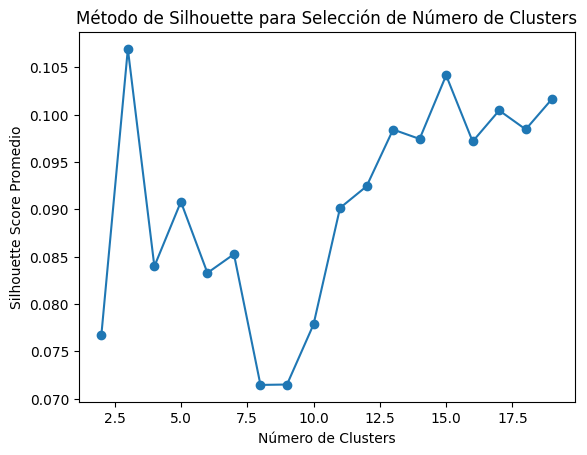

In [6]:
#SILHOUETTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definir el rango de clusters a probar
range_n_clusters = list(range(2, 20))

silhouette_avg = []

# Correr KMeans para distintos números de clusters y calcular el coeficiente de silhouette
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(NCI60_clean)
    silhouette_avg.append(silhouette_score(NCI60_clean, cluster_labels))

# Graficar los resultados
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score Promedio')
plt.title('Método de Silhouette para Selección de Número de Clusters en KMEANS')
plt.show()


El gráfico del coeficiente de Silhouette tiene su máximo valor en K=3 (valor cercano a 0.105), lo que sugiere que 3 clusters es una buena opción. Después de
K=3, el coeficiente de Silhouette disminuye y varía, lo que indica que no mejora la separación ni la cohesión al incrementar el número de clusters.

**Conclusión** Según el coeficiente de Silhouette,K=3 sería el número más adecuado, ya que maximiza la calidad de la agrupación.

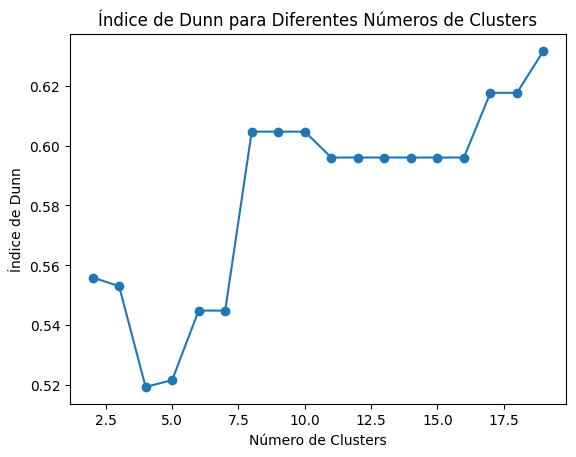

In [ ]:
#DUNN

import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Función para calcular el Índice de Dunn
def dunn_index(X, labels):
    # Obtener las distancias entre cada punto
    distances = pairwise_distances(X)

    # Obtener los clusters únicos
    unique_clusters = np.unique(labels)

    # Calcular la cohesión (máxima distancia intra-cluster)
    intra_distances = []
    for cluster in unique_clusters:
        cluster_points = X[labels == cluster]
        if len(cluster_points) > 1:
            intra_distances.append(np.max(pairwise_distances(cluster_points)))
        else:
            intra_distances.append(0)  # Si hay un solo punto en el cluster, la distancia es 0

    max_intra_dist = np.max(intra_distances)

    # Calcular la separación (mínima distancia inter-cluster)
    inter_distances = []
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            points_cluster_i = X[labels == unique_clusters[i]]
            points_cluster_j = X[labels == unique_clusters[j]]
            inter_distances.append(np.min(pairwise_distances(points_cluster_i, points_cluster_j)))

    min_inter_dist = np.min(inter_distances)

    # Calcular el índice de Dunn
    dunn = min_inter_dist / max_intra_dist
    return dunn

# Rango de número de clusters a probar
range_n_clusters = list(range(2, 20))

# Lista para almacenar los valores del Índice de Dunn
dunn_values = []

# Correr KMeans para distintos números de clusters y calcular el Índice de Dunn
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(NCI60_clean)
    dunn_score = dunn_index(NCI60_clean.values, cluster_labels)
    dunn_values.append(dunn_score)

# Graficar los resultados del Índice de Dunn
plt.plot(range_n_clusters, dunn_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Dunn')
plt.title('Índice de Dunn para Diferentes Números de Clusters en KMEANS')
plt.show()


En el gráfico del Índice de Dunn, se observa un incremento a partir de K=6, con una meseta en K=10 y un aumento notable hacia K=18 (donde el valor es máximo en 0.62).

**Conclusión**: Según el Índice de Dunn, K=18 podría ser una buena elección, ya que maximiza la separación entre los clusters y minimiza la cohesión interna. Sin embargo, K=10 es también una opción razonable ya que alcanza un valor alto y estable en ese punto.

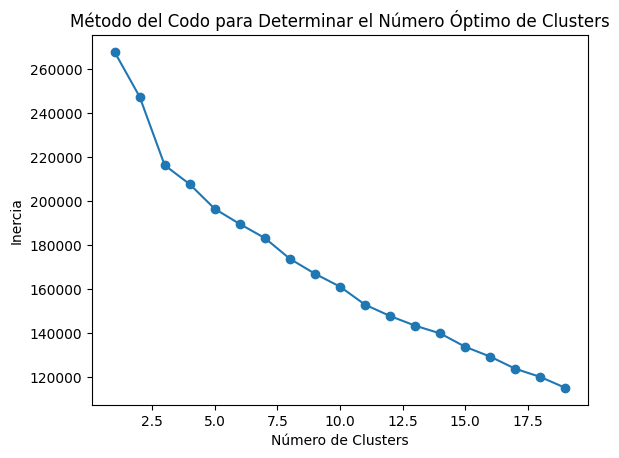

In [ ]:
#METODO DEL CODO

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de número de clusters a probar
range_n_clusters = list(range(1, 20))

# Lista para almacenar los valores de la inercia (suma de los cuadrados intra-cluster)
inertia = []

# Correr KMeans para distintos números de clusters y calcular la inercia
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(NCI60_clean)
    inertia.append(kmeans.inertia_)

# Graficar los resultados del Método del Codo
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters en KMEANS')
plt.show()


En el gráfico del Método del Codo, se puede ver una clara "caída" significativa de la inercia hasta K=4. Después de este punto, las disminuciones en la inercia son más graduales, lo que indica que agregar más clusters no reduce mucho la inercia y podría ser sobreajuste.

**Conclusión**: Según el Método del Codo, K=4 sería un buen valor, ya que representa el punto donde la disminución en la inercia comienza a ser menos significativa.


---


**CONCLUSION GLOBAL**: Dado que el coeficiente de Silhouette es muy respetado para evaluar la calidad de los clusters a nivel de cada punto, y el Método del Codo también respalda un valor cercano, una recomendación final sería seleccionar 3 o 4 clusters como el número más adecuado. Sin embargo, si quisieramos una mayor separación y el Índice de Dunn es tu principal criterio, puedes considerar hasta 10 clusters como opción intermedia.

**2- Aplicar kmeans y PAM a los mismos. Calcular los grados de similitud entre la partición generada por PAM y la generada por kmeans**
- indice de rand
- indice de jaccard


---


Los índices de Rand y Jaccard son adecuados para medir la similitud entre dos particiones generadas por diferentes métodos de clustering, como KMeans y PAM. Ambos índices evalúan qué tan similares son los grupos resultantes entre las dos particiones comparando las asignaciones de las observaciones a los clusters.

**¿Por qué son útiles los índices de Rand y Jaccard para medir similitud entre particiones?**

**Índice de Rand(ARI):**

- Propósito: Mide el grado de acuerdo entre dos particiones. Evalúa cuántos pares de puntos son clasificados de manera consistente en ambas particiones, es decir, si están en el mismo cluster o en diferentes clusters en ambas particiones.
- Valoración: El valor del Índice de Rand está entre 0 y 1, donde 0 significa que las particiones son completamente diferentes, y 1 significa que son idénticas.

**Índice de Jaccard:**

- Propósito: Calcula la similitud entre dos conjuntos de datos en términos de la cantidad de puntos que son asignados al mismo cluster en ambas particiones.
- Valoración: Similar al índice de Rand, su valor varía entre 0 y 1, donde 1 significa que los clusters son exactamente iguales.

Ambos son apropiados para comparar los resultados de KMeans y PAM porque nos dan una medida clara de qué tan similares son las agrupaciones.

Labels generados por KMeans: [0 0 2 2 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1]


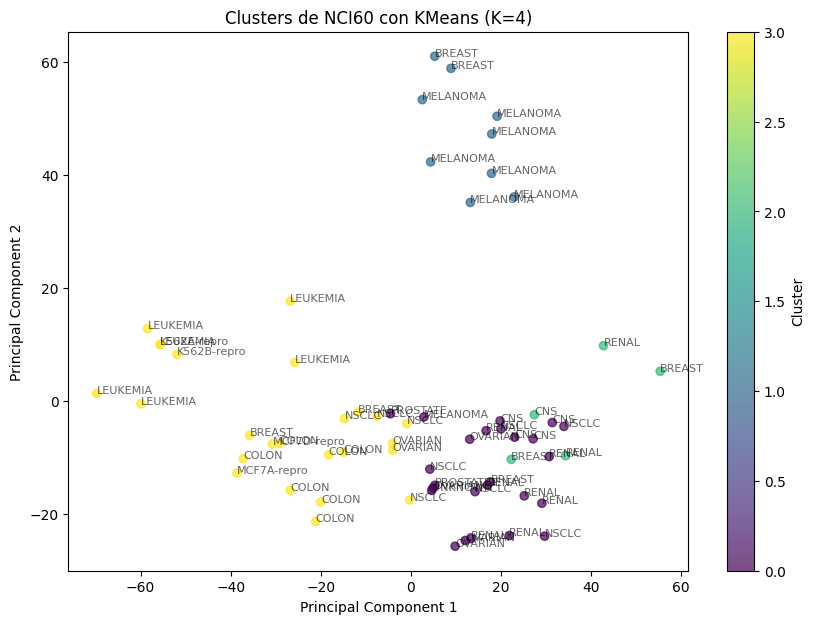

In [17]:
#Aplico KMEANS con K=4
from sklearn.cluster import KMeans

# Estandarizar los datos
scaler = StandardScaler()
nci_data_scaled = scaler.fit_transform(nci_data)

# Aplicar KMeans con K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(nci_data_scaled)

print("Labels generados por KMeans:", kmeans_labels)

# Reducir la dimensionalidad para visualización (usaremos 2 componentes principales)
pca = PCA(n_components=2)
nci_data_pca = pca.fit_transform(nci_data_scaled)

# Convertir a DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data=nci_data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_labels
df_pca['Etiqueta'] = nci_labs

# Visualizar los clusters y las etiquetas
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters de NCI60 con KMeans (K=4)')

# Opcional: Mostrar etiquetas de las líneas celulares
for i in range(df_pca.shape[0]):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Etiqueta'][i], fontsize=8, alpha=0.6)

plt.show()


AVERIGUO CUAL ES EL MEJOR K PARA PAM, con SILOHUETTE Y METODO DEL CODO.

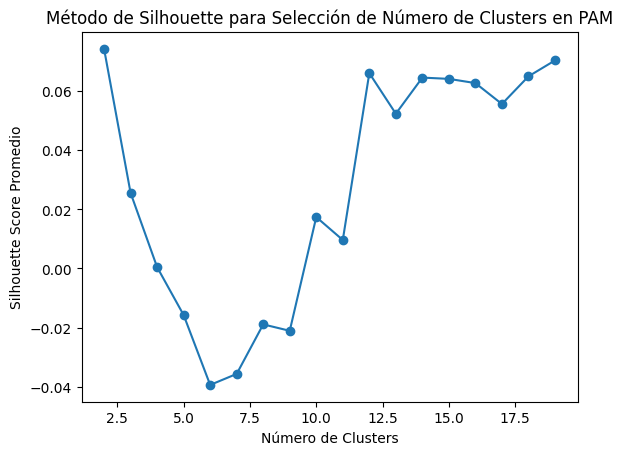

In [24]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Definir el rango de clusters a probar
range_n_clusters = list(range(2, 20))

silhouette_avg = []

# Correr KMedoids para distintos números de clusters y calcular el coeficiente de silhouette
for num_clusters in range_n_clusters:
    pam = KMedoids(n_clusters=num_clusters, random_state=42)
    cluster_labels = pam.fit_predict(NCI60_clean)
    silhouette_avg.append(silhouette_score(NCI60_clean, cluster_labels))

# Graficar los resultados
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score Promedio')
plt.title('Método de Silhouette para Selección de Número de Clusters en PAM')
plt.show()

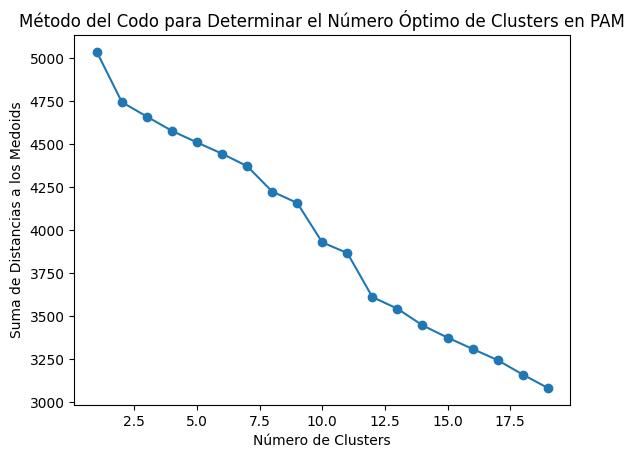

In [25]:
# Rango de número de clusters a probar
range_n_clusters = list(range(1, 20))

# Lista para almacenar la suma de las distancias dentro de cada cluster
pam_cost = []

# Correr KMedoids para distintos números de clusters y calcular la suma de distancias intra-cluster
for num_clusters in range_n_clusters:
    pam = KMedoids(n_clusters=num_clusters, random_state=42)
    pam.fit(NCI60_clean)
    # Calcular la suma de las distancias dentro de cada cluster al medoid
    pam_cost.append(pam.inertia_)  # `inertia_` en KMedoids es la suma de distancias a los medoids

# Graficar los resultados del Método del Codo
plt.plot(range_n_clusters, pam_cost, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias a los Medoids')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters en PAM')
plt.show()

Voy a usar K=4 porque:
con silohuette estoy maximizando en K=2 y en k=18. 18 clusters me van a hacer perder interpretabilidad, y concentrar solamente en 2 clusters puede generar que pierda datos importantes de agrupamientos.
con el metodo del codo parece haber una disminucion en la velocidad de la pendiente entre k=4 y k=5. Elijo K=4.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00


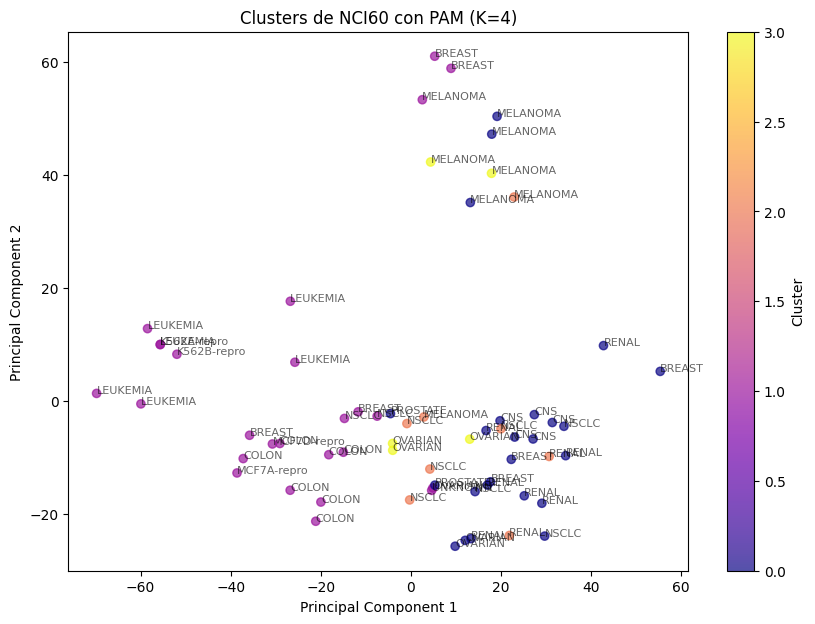

In [12]:
#APLICO PAM CON K=4

!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

# Aplicar PAM con K=4
pam = KMedoids(n_clusters=4, random_state=42)
pam_labels = pam.fit_predict(nci_data_scaled)

# Reducir la dimensionalidad para visualización (2 componentes principales)
pca = PCA(n_components=2)
nci_data_pca = pca.fit_transform(nci_data_scaled)

# Convertir a DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data=nci_data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = pam_labels
df_pca['Etiqueta'] = nci_labs

# Visualizar los clusters generados por PAM con sus etiquetas
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters de NCI60 con PAM (K=4)')

# Opcional: Mostrar etiquetas de las líneas celulares
for i in range(df_pca.shape[0]):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['Etiqueta'][i], fontsize=8, alpha=0.6)

plt.show()


In [ ]:
#INDICE DE RAND
from sklearn.metrics import adjusted_rand_score

# Calcular el Índice de Rand
rand_index = adjusted_rand_score(kmeans_labels, pam_labels)

print("Índice de Rand Ajustado entre KMeans y PAM:", rand_index)


Índice de Rand Ajustado entre KMeans y PAM: 0.1537002655167595


Un valor de 0.154 es bajo, lo que sugiere que las particiones generadas por KMeans y PAM no son muy similares. Esto significa que los dos algoritmos de clustering están asignando los puntos de datos a diferentes clusters con una similitud baja.

**Diversidad en las agrupaciones:** El valor bajo del ARI indica que KMeans y PAM están agrupando los puntos de manera diferente, posiblemente porque cada algoritmo tiene un enfoque distinto:

- KMeans se basa en centroides, lo que puede llevar a agrupaciones esféricas o circulares.
- PAM se basa en "medoids", que son puntos reales en los datos, lo que puede generar clusters con formas más irregulares.

El Índice de Jaccard se puede calcular utilizando jaccard_score de sklearn.metrics. Sin embargo, como el jaccard_score está diseñado principalmente para clasificación binaria, debemos modificarlo un poco para trabajar con clusters múltiples. Utilizaremos la opción de average='macro' para obtener un promedio de las similitudes entre clusters.

In [ ]:
#INDICE DE JACCARD
from sklearn.metrics import jaccard_score

# Calcular el Índice de Jaccard
# Necesitamos ajustar jaccard_score para múltiples clusters
jaccard_index = jaccard_score(kmeans_labels, pam_labels, average='macro')

print("Índice de Jaccard entre KMeans y PAM:", jaccard_index)


Índice de Jaccard entre KMeans y PAM: 0.0857843137254902


Un valor de 0.086 es muy bajo, lo que indica que hay poca similitud entre las particiones generadas por KMeans y PAM.
En otras palabras, solo una pequeña fracción de puntos fue asignada al mismo cluster por ambos algoritmos. La gran mayoría de los puntos fueron agrupados de manera diferente por los dos métodos.

**Implicaciones del valor bajo del Índice de Jaccard:**
- Diversidad en la agrupación: El hecho de que el índice sea tan bajo refuerza la idea de que KMeans y PAM están agrupando los puntos de manera muy diferente. Esto puede deberse a las características de los algoritmos:

- KMeans se basa en la minimización de la distancia a los centroides (que son el centro geométrico de los clusters).
PAM se basa en la minimización de la distancia a los medoids (puntos de datos reales), lo que puede producir clusters diferentes.

**3- Graficar dendrogramas utilizando las distintas medidas de disimilaridad que proporciona la función hclust de R (complete, single, average, centroid y Ward). ¿Cuáles de los dendrogramas realiza un ajuste más en concordancia con las distancias originales entre los datos?**

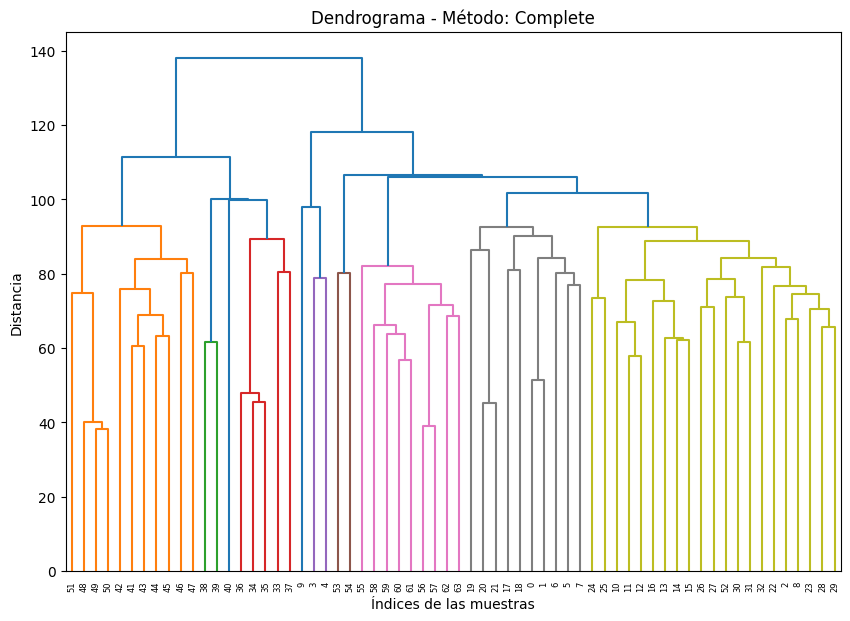

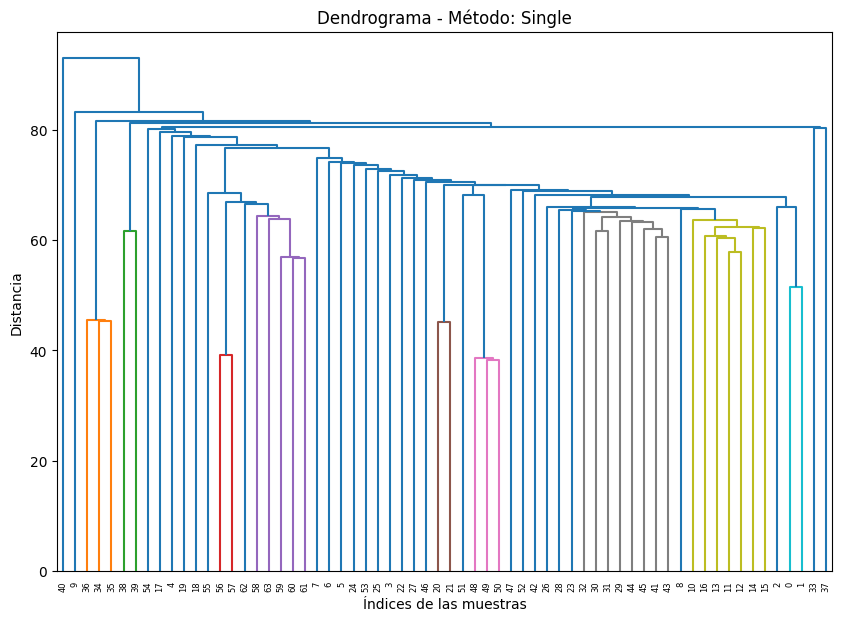

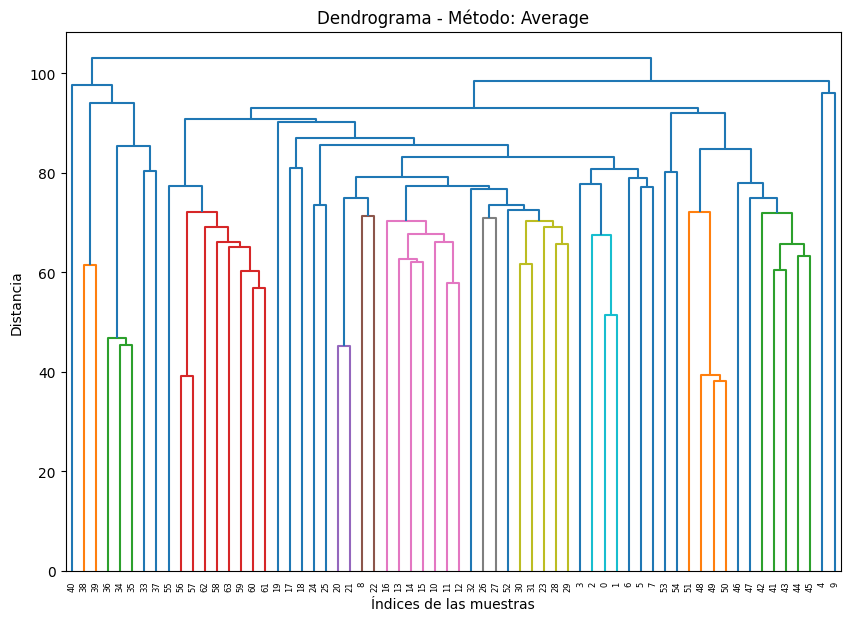

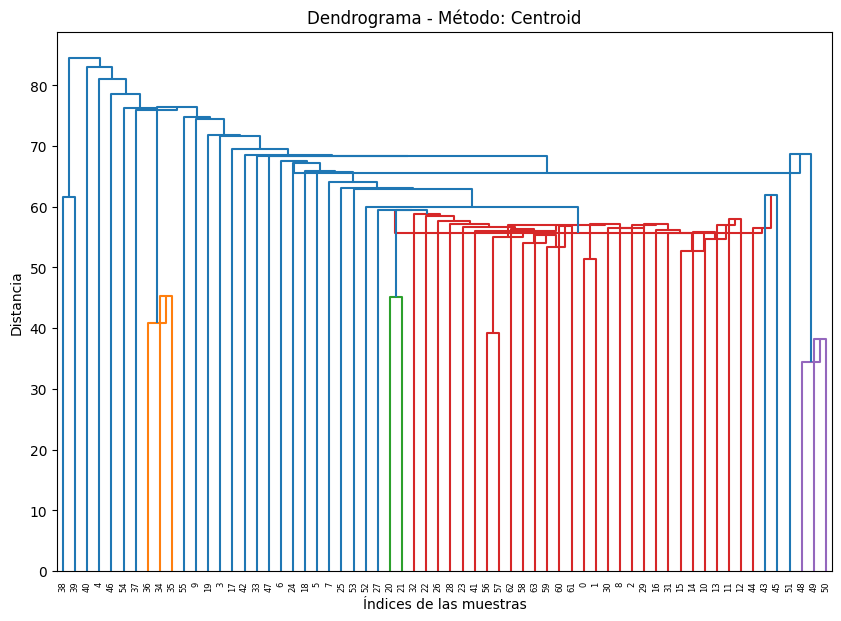

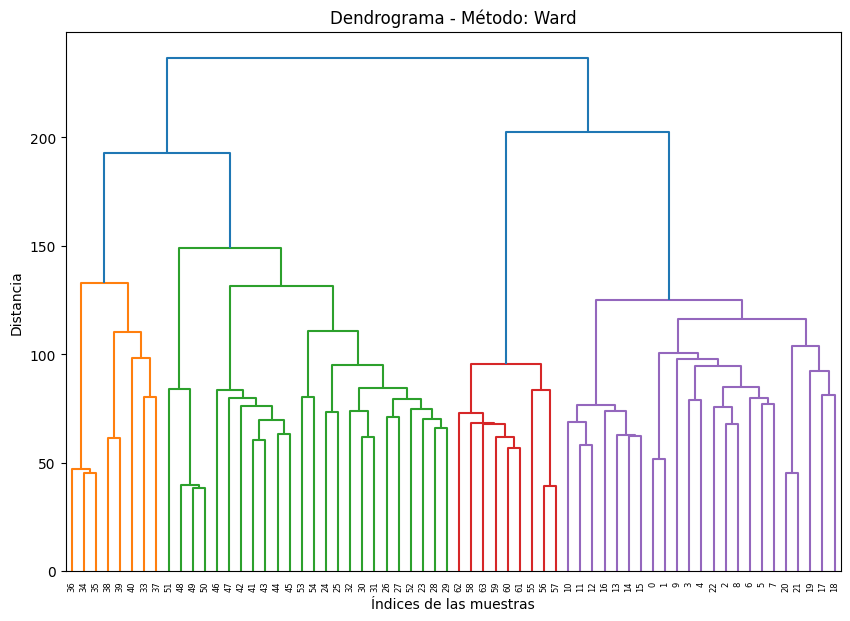

In [ ]:
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# NCI60_clean es el dataframe con los datos numéricos limpios
# Calcular la matriz de distancias usando la distancia euclidiana
distance_matrix = pdist(NCI60_clean.values, metric='euclidean')

# Función para generar y graficar dendrogramas
def plot_dendrogram(linkage_matrix, method_name):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrograma - Método: {method_name}')
    plt.xlabel('Índices de las muestras')
    plt.ylabel('Distancia')
    plt.show()

# Método Complete (máxima distancia entre clusters)
complete_linkage = linkage(distance_matrix, method='complete')
plot_dendrogram(complete_linkage, 'Complete')

# Método Single (mínima distancia entre clusters)
single_linkage = linkage(distance_matrix, method='single')
plot_dendrogram(single_linkage, 'Single')

# Método Average (distancia promedio entre clusters)
average_linkage = linkage(distance_matrix, method='average')
plot_dendrogram(average_linkage, 'Average')

# Método Centroid (distancia entre los centroides de los clusters)
centroid_linkage = linkage(distance_matrix, method='centroid')
plot_dendrogram(centroid_linkage, 'Centroid')

# Método Ward (minimización de la varianza dentro de los clusters)
ward_linkage = linkage(distance_matrix, method='ward')
plot_dendrogram(ward_linkage, 'Ward')


**Explicación:**

1. **Calcular la matriz de distancias:**
Utilizamos pdist con el método 'euclidean' para calcular la distancia euclidiana entre todas las observaciones en NCI60_clean. Esta es la base para generar los dendrogramas.
Dendrograma con diferentes métodos:

2. **Usamos la función linkage de scipy para aplicar diferentes métodos de enlace:**
- complete: Máxima distancia entre clusters.
single: Mínima distancia entre clusters.
- average: Promedio de las distancias entre todos los puntos de los clusters.
- centroid: Distancia entre los centroides de los clusters.
- ward: Minimiza la varianza dentro de los clusters (similar a KMeans en su objetivo).
3. **Graficar el dendrograma:**
La función dendrogram genera los gráficos correspondientes. En el título de cada gráfico, especificamos el método de enlace utilizado.

**Análisis y comparación de los dendrogramas:**
Una vez que generamos los dendrogramas, podemos compararlos visualmente para ver cuál se ajusta mejor a las distancias originales entre los datos.

**¿Cómo determinar cuál ajuste es mejor?**
Para evaluar cuál de los dendrogramas es más consistente con las distancias originales, podemos:

- visualizar: Un dendrograma que refleja bien las distancias originales debería mostrar clusters bien definidos y separados, sin divisiones forzadas ni uniones de clusters muy alejados.

- **Cophenetic Correlation Coefficient:** Otra forma cuantitativa de medir qué tan bien un dendrograma ajusta las distancias originales es utilizando el coeficiente de correlación cofenética. Este mide la correlación entre las distancias cofenéticas (las distancias entre puntos en el dendrograma) y las distancias originales.

In [ ]:
#COPHENETIC CORRELATION COEFFICIENT
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Calcular el coeficiente de correlación cofenética para cada método
for method_name, linkage_matrix in [('Complete', complete_linkage),
                                    ('Single', single_linkage),
                                    ('Average', average_linkage),
                                    ('Centroid', centroid_linkage),
                                    ('Ward', ward_linkage)]:
    c, _ = cophenet(linkage_matrix, distance_matrix)
    print(f"Coeficiente cofenético ({method_name}): {c}")


Coeficiente cofenético (Complete): 0.6583999556846352
Coeficiente cofenético (Single): 0.6829894520268885
Coeficiente cofenético (Average): 0.7690221437246236
Coeficiente cofenético (Centroid): 0.7258925162893272
Coeficiente cofenético (Ward): 0.5391595314272452


**Conclusiones sobre los coeficientes cofenéticos obtenidos:**

Tras calcular los coeficientes cofenéticos para cada uno de los métodos de enlace, los resultados fueron los siguientes:

- Complete: 0.6584
- Single: 0.6830
- Average: 0.7690
- Centroid: 0.7259
- Ward: 0.5392

El coeficiente cofenético mide qué tan bien las distancias en el dendrograma reflejan las distancias originales entre los puntos de datos. Valores más cercanos a 1 indican un ajuste mejor.

En este caso, el método de **enlace average** es el que mejor refleja las distancias originales entre los datos, con un coeficiente cofenético de 0.7690, lo que sugiere que este dendrograma es el más adecuado para describir la estructura de los datos. El **método centroid**, con un valor de 0.7259, también ofrece un ajuste razonable, aunque un poco menor al de average.

Por otro lado, el **método single**, con un coeficiente de 0.6830, aunque no es el mejor, sigue mostrando una correspondencia aceptable con las distancias originales. Sin embargo, este método es propenso a generar "chaining" (formación de largas cadenas de puntos), lo cual puede no representar correctamente la verdadera estructura de los clusters.

El** método de enlace complete**, con un valor de 0.6584, no muestra un ajuste tan bueno como los métodos average y centroid, aunque aún conserva cierta correspondencia con las distancias originales. Este método tiende a formar clusters más compactos, pero puede distorsionar las distancias entre puntos alejados.

Finalmente, el **método de Ward** es el que peor refleja las distancias originales, con un coeficiente de 0.5392. Aunque el método de Ward es útil para minimizar la varianza dentro de los clusters, en este caso, no logra representar correctamente las distancias entre los puntos.

En resumen, el método de enlace average parece ser el más adecuado para representar las distancias originales entre los datos, seguido de cerca por el método centroid. Los métodos single y complete ofrecen resultados aceptables, pero el método Ward es el que peor se ajusta a las distancias originales.

# **Ejercicio 3. Repetir el ejercicio 2 pero tomando como individuos las lineas genéticas.**

Al transponer la matriz, cada fila representará un gen y cada columna una línea celular. Esto permite realizar clustering de genes en lugar de clustering de líneas celulares. Este enfoque puede ser útil si el objetivo es:

- Identificar genes con patrones de expresión similares: Agrupar los genes según cómo se expresan en las distintas líneas celulares puede ayudarte a descubrir genes que estén relacionados funcionalmente o que respondan de manera similar a ciertos tipos de cáncer.
- Buscar módulos génicos o conjuntos de genes co-expresados, lo que podría dar insights sobre procesos biológicos o vías de señalización implicadas en diferentes tipos de cáncer.

In [13]:
##usar la matriz traspuesta del dataset

# Cargar datos y etiquetas
NCI60 = pd.read_csv('NCI60.csv')
nci_labs = NCI60['labs']
nci_data = NCI60.drop(['Unnamed: 0', 'labs'], axis=1)

# Transponer el dataset para que las líneas genéticas sean los individuos
nci_data_transposed = nci_data.T
nci_data_transposed.columns = nci_labs  # Renombrar las columnas con las etiquetas de líneas genéticas


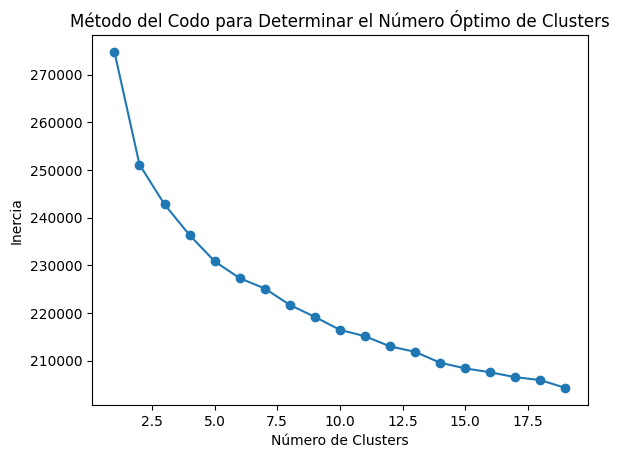

In [16]:
#METODO DEL CODO para elegir K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de número de clusters a probar
range_n_clusters = list(range(1, 20))

# Lista para almacenar los valores de la inercia (suma de los cuadrados intra-cluster)
inertia = []

# Correr KMeans para distintos números de clusters y calcular la inercia
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(nci_data_transposed)
    inertia.append(kmeans.inertia_)

# Graficar los resultados del Método del Codo
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters en KMEANS')
plt.show()


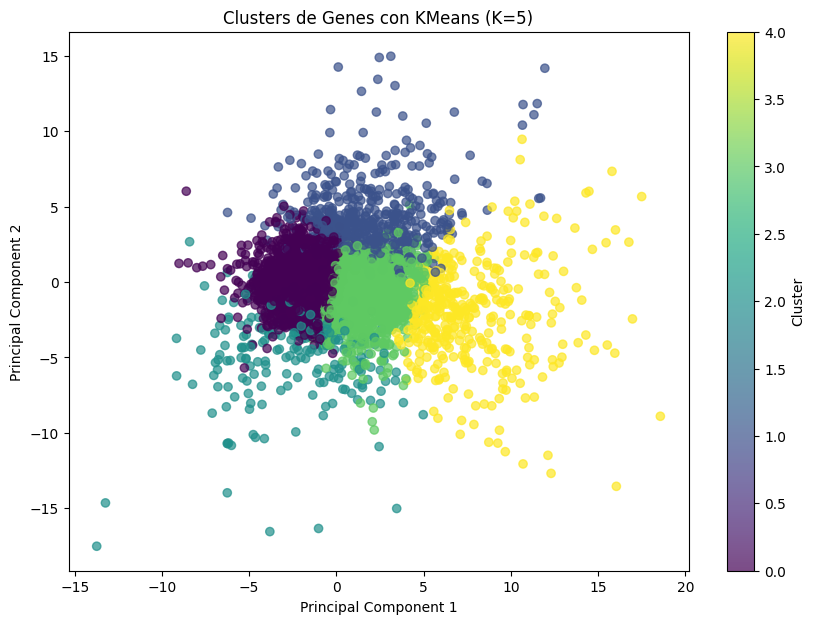

In [19]:
#Aplico KMEANS con K=5
from sklearn.cluster import KMeans

# Estandarizar los datos transpuestos
scaler = StandardScaler()
nci_data_transposed_scaled = scaler.fit_transform(nci_data_transposed)

# Aplicar KMeans con K=5 sobre el dataset transpuesto
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(nci_data_transposed_scaled)

# Reducir la dimensionalidad para visualización (2 componentes principales)
pca = PCA(n_components=2)
nci_data_pca = pca.fit_transform(nci_data_transposed_scaled)

# Convertir a DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data=nci_data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_labels

# Visualizar los clusters generados por KMeans con K=5
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters de Genes con KMeans (K=5)')

plt.show()


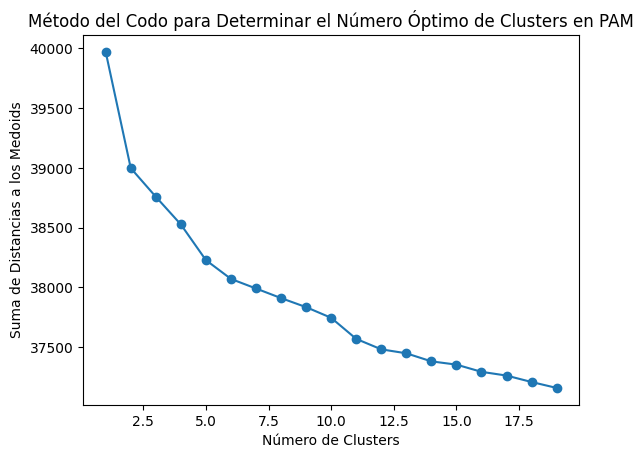

In [26]:
#METODO DEL CODO para elegir K en PAM
# Rango de número de clusters a probar
range_n_clusters = list(range(1, 20))

# Lista para almacenar la suma de las distancias dentro de cada cluster
pam_cost = []

# Correr KMedoids para distintos números de clusters y calcular la suma de distancias intra-cluster
for num_clusters in range_n_clusters:
    pam = KMedoids(n_clusters=num_clusters, random_state=42)
    pam.fit(nci_data_transposed)
    # Calcular la suma de las distancias dentro de cada cluster al medoid
    pam_cost.append(pam.inertia_)  # `inertia_` en KMedoids es la suma de distancias a los medoids

# Graficar los resultados del Método del Codo
plt.plot(range_n_clusters, pam_cost, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias a los Medoids')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters en PAM')
plt.show()

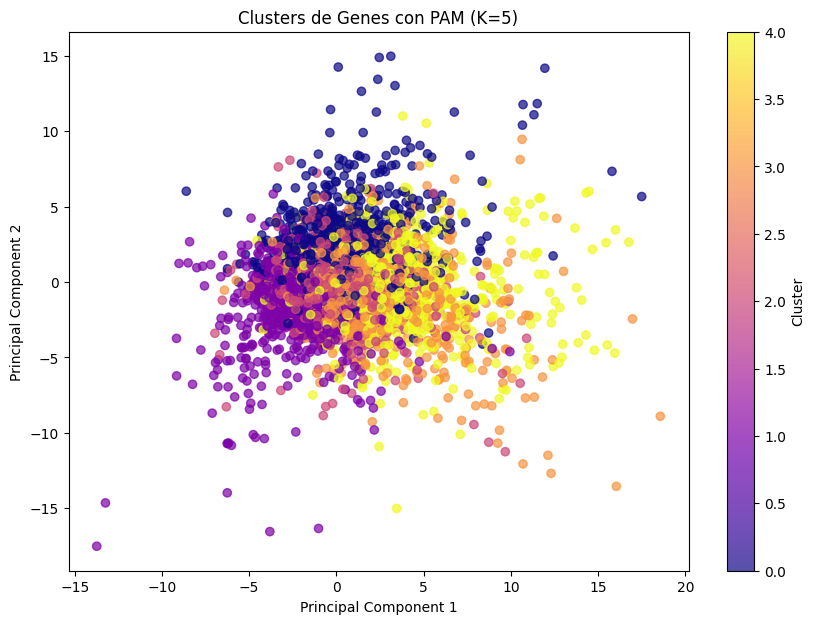

In [20]:
#Aplico PAM con K=5


# Aplicar PAM con K=5 sobre el dataset transpuesto
pam = KMedoids(n_clusters=5, random_state=42)
pam_labels = pam.fit_predict(nci_data_transposed_scaled)

# Reducir la dimensionalidad para visualización (2 componentes principales)
pca = PCA(n_components=2)
nci_data_pca = pca.fit_transform(nci_data_transposed_scaled)

# Convertir a DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data=nci_data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = pam_labels

# Visualizar los clusters generados por PAM con K=5
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters de Genes con PAM (K=5)')

plt.show()

#de una puedo visualizar que KMEANS estaria agrupando mejor que PAM.

In [21]:
#INDICE DE RAND
from sklearn.metrics import adjusted_rand_score

# Calcular el Índice de Rand
rand_index = adjusted_rand_score(kmeans_labels, pam_labels)

print("Índice de Rand Ajustado entre KMeans y PAM:", rand_index)

#INDICE DE JACCARD
from sklearn.metrics import jaccard_score

# Calcular el Índice de Jaccard
# Necesitamos ajustar jaccard_score para múltiples clusters
jaccard_index = jaccard_score(kmeans_labels, pam_labels, average='macro')

print("Índice de Jaccard entre KMeans y PAM:", jaccard_index)


Índice de Rand Ajustado entre KMeans y PAM: 0.10517022998664301
Índice de Jaccard entre KMeans y PAM: 0.14267195333396565


El indice de Jaccard da mejor que cuando no tomabamos los datos traspuestos, el ARI (adjusted rand index) dio 0.105 = similitud muy baja entre los clusters generados por los dos metodos. A pesar de que Jaccard con este dataset da mejor igualmente es un valor alejado de 1, por lo que tambien denota poca similitud.

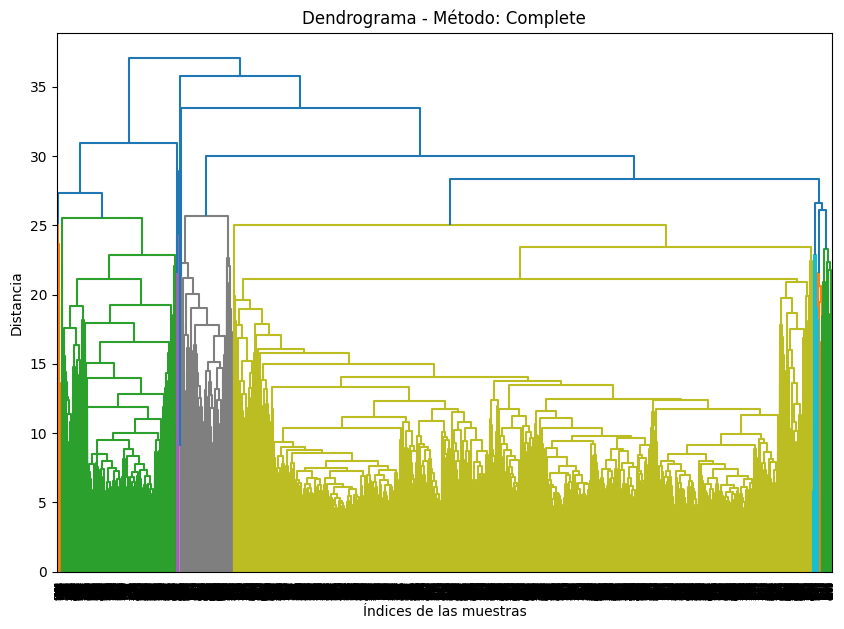

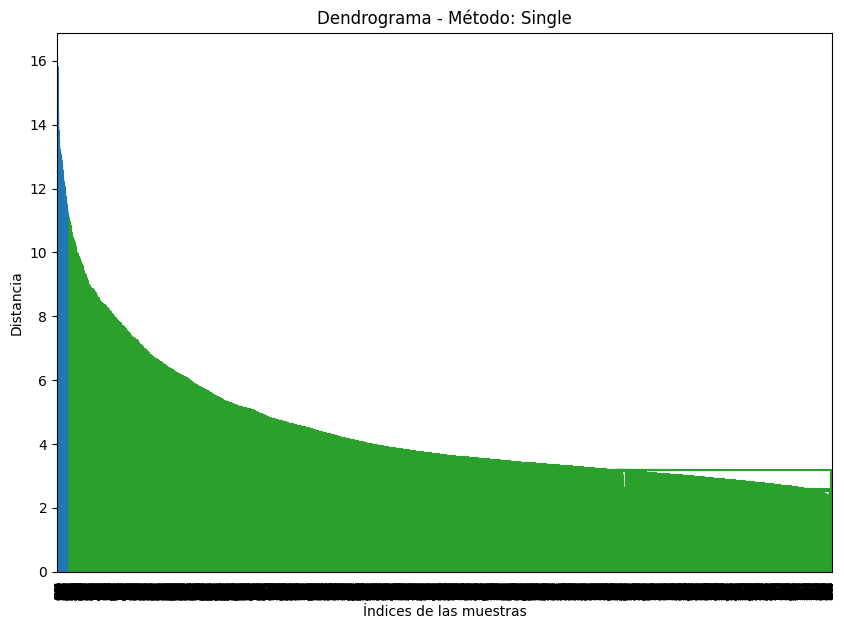

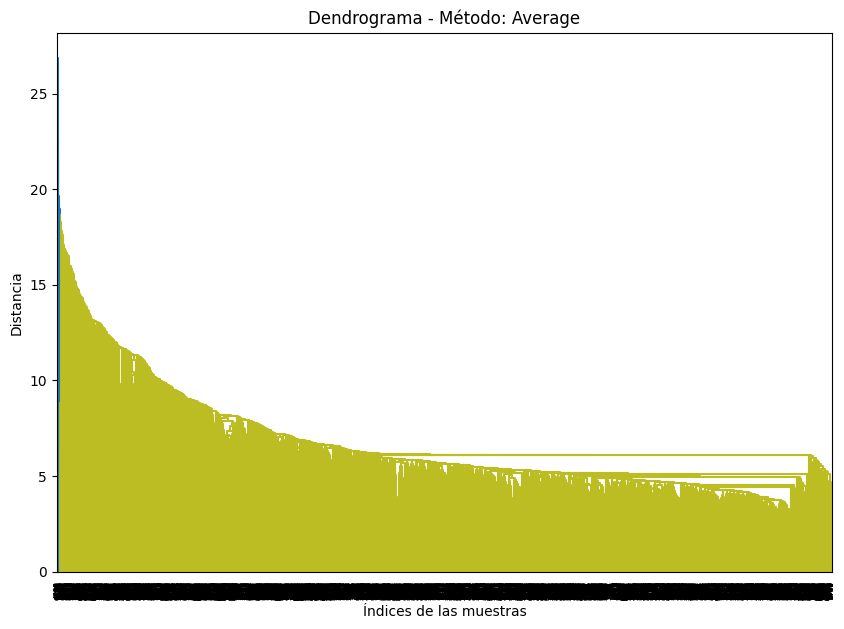

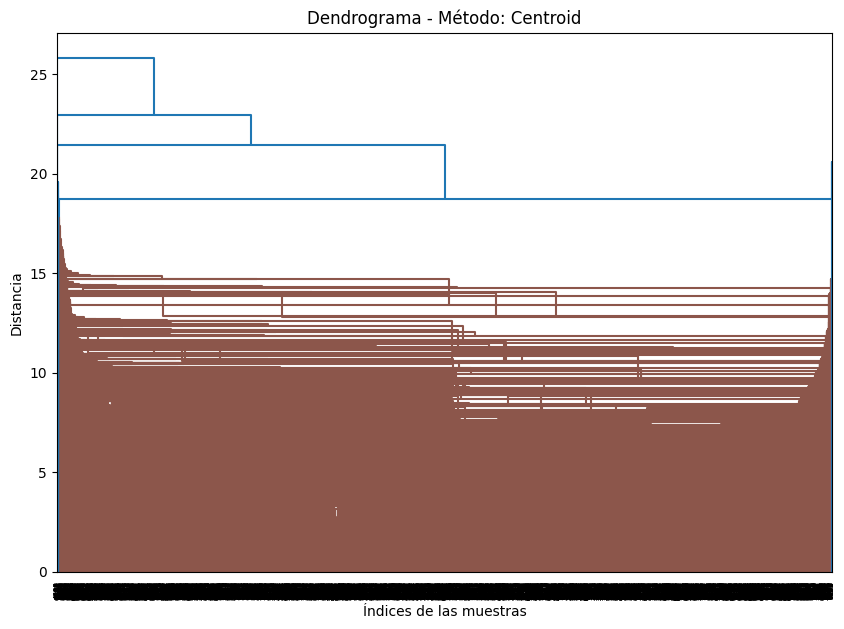

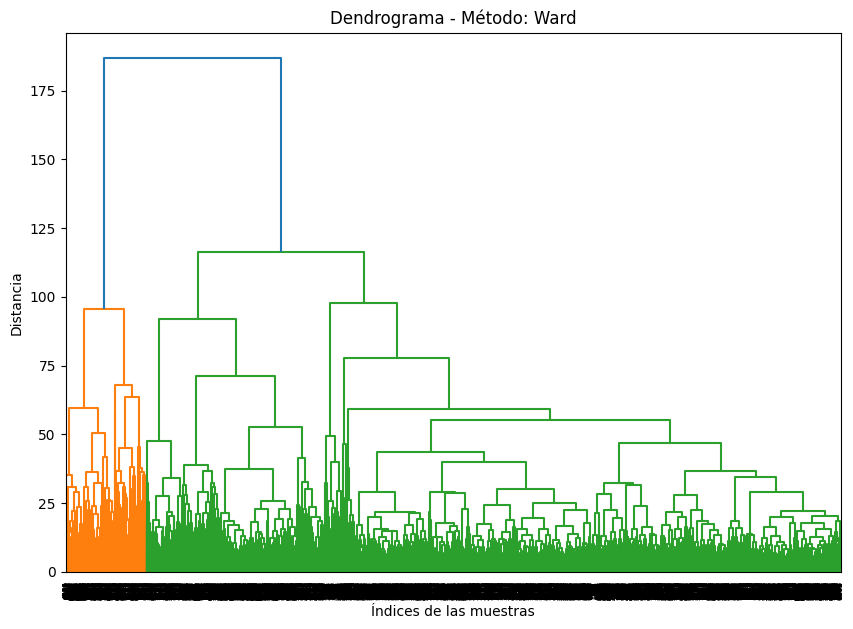

In [23]:
## esta dificil visualizar en los dendogramas cuantos clusters porque hay demasiados datos y no se ve claramente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import sys
sys.setrecursionlimit(10000)  # Ajustar el límite de recursión a un valor más alto

#  nci_data_transposed es tu dataframe con los datos numéricos limpios
# Calcular la matriz de distancias usando la distancia euclidiana
distance_matrix = pdist(nci_data_transposed.values, metric='euclidean')

# Función para generar y graficar dendrogramas
def plot_dendrogram(linkage_matrix, method_name):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrograma - Método: {method_name}')
    plt.xlabel('Índices de las muestras')
    plt.ylabel('Distancia')
    plt.show()

# Método Complete (máxima distancia entre clusters)
complete_linkage = linkage(distance_matrix, method='complete')
plot_dendrogram(complete_linkage, 'Complete')

# Método Single (mínima distancia entre clusters)
single_linkage = linkage(distance_matrix, method='single')
plot_dendrogram(single_linkage, 'Single')

# Método Average (distancia promedio entre clusters)
average_linkage = linkage(distance_matrix, method='average')
plot_dendrogram(average_linkage, 'Average')

# Método Centroid (distancia entre los centroides de los clusters)
centroid_linkage = linkage(distance_matrix, method='centroid')
plot_dendrogram(centroid_linkage, 'Centroid')

# Método Ward (minimización de la varianza dentro de los clusters)
ward_linkage = linkage(distance_matrix, method='ward')
plot_dendrogram(ward_linkage, 'Ward')
